### Confusion Matrix 확인

In [ ]:
import torch
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 로드
model = torch.load('./main_models/model_gesture_frame_30_indj.pt', map_location='cpu')
model.eval()

# 라벨 매핑
gesture = {
    0 : 'Right',
    1 : 'Left',
    2 : 'Turn Clockwise',
    3 : 'Turn Anticlockwise',
    4 : 'Twinkle',
    5 : 'Okay',
    6 : 'Stop',
    7 : 'Rock',
    8 : 'Play',
    9 : 'Slide',
    10 : 'None'
}
labels = list(gesture.values())



/tmp/ipykernel_815168/3822308624.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./main_models_add/model_gesture_frame_15_indj_2.pt', map_location='c

In [14]:
# 테스트 CSV 폴더
test_dir = './augmented_csv_indj_test_2_frame_15/'
files = [f for f in os.listdir(test_dir) if f.endswith('.csv')]

all_preds = []
all_labels = []
wrong_preds = []  # 오분류 저장 리스트

for fname in sorted(files):
    data = np.loadtxt(os.path.join(test_dir, fname), delimiter=',')
    
    if data.shape[0] != 15:
        print(f"⚠️ {fname} → 프레임 수 {data.shape[0]}개 → 제외됨")
        continue

    x = torch.FloatTensor(data[:, :99]).unsqueeze(0)  # (1, 30, 99)
    
    try:
        y_true = int(data[0, 99])  # 모든 프레임이 같은 라벨이라고 가정
    except:
        print(f"⚠️ {fname} → 라벨 오류 발생")
        continue

    with torch.no_grad():
        y_pred = model(x)
        pred_label = torch.argmax(y_pred, dim=1).item()

    all_preds.append(pred_label)
    all_labels.append(y_true)
    
    if pred_label != y_true:
        wrong_preds.append((fname, y_true, pred_label))


/home/sua/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [14]:
import pandas as pd

df_wrong = pd.DataFrame(wrong_preds, columns=['파일명', '실제 라벨', '예측 라벨'])
df_wrong.to_csv("misclassified_samples.csv", index=False, encoding='utf-8-sig')
print(f"⚠️ 총 {len(df_wrong)}개의 오분류 파일 저장 완료: misclassified_samples.csv")

⚠️ 총 260개의 오분류 파일 저장 완료: misclassified_samples.csv


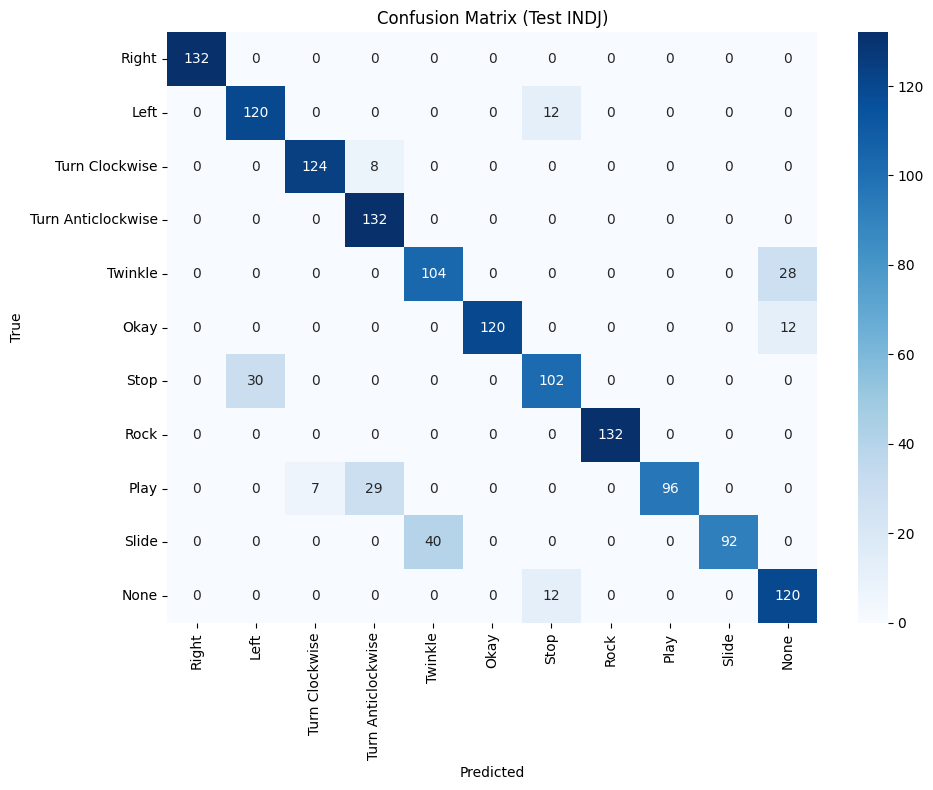

===== 📊 Classification Report (Test INDJ) =====
                    precision    recall  f1-score   support

             Right     1.0000    1.0000    1.0000       132
              Left     0.8000    0.9091    0.8511       132
    Turn Clockwise     0.9466    0.9394    0.9430       132
Turn Anticlockwise     0.7811    1.0000    0.8771       132
           Twinkle     0.7222    0.7879    0.7536       132
              Okay     1.0000    0.9091    0.9524       132
              Stop     0.8095    0.7727    0.7907       132
              Rock     1.0000    1.0000    1.0000       132
              Play     1.0000    0.7273    0.8421       132
             Slide     1.0000    0.6970    0.8214       132
              None     0.7500    0.9091    0.8219       132

          accuracy                         0.8774      1452
         macro avg     0.8918    0.8774    0.8776      1452
      weighted avg     0.8918    0.8774    0.8776      1452



In [15]:
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test INDJ)')
plt.tight_layout()
plt.show()

# Classification Report
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_preds, target_names=labels, digits=4)
print("===== 📊 Classification Report (Test INDJ) =====")
print(report)
